In [113]:
from sklearn import datasets

import numpy as np
import pandas as pd

In [114]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/igor/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
(X, y) = datasets.load_boston(return_X_y=True)

In [5]:
X.shape

(506, 13)

In [13]:
from sklearn.cross_validation import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, 
                                     random_state=0)

In [14]:
X_train.shape

(379, 13)

In [144]:
y_train.shape

(379,)

In [148]:
sqrt(sum(y_train**2)/y_train.shape[0])

24.422568934305897

In [149]:
sqrt(sum(y_test**2)/y_test.shape[0])

24.068028585656947

In [16]:
from sklearn import tree

In [57]:
clf_0 = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
clf_0.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [58]:
clf_0.predict(X)[0]

27.06153846153847

In [88]:
base_algorithms_list = [clf_0]
coefficients_list = [1]

In [87]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in 
                 zip(base_algorithms_list, coefficients_list)]) for x in X]

In [97]:
for i in range(50):
    y_fit = (y_train - gbm_predict(X_train))
    clf = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
    clf.fit(X_train, y_fit)
    base_algorithms_list.append(clf)
    coefficients_list.append(0.9)

In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [99]:
RMSE_train_2 = sqrt(mean_squared_error(y_train, gbm_predict(X_train)))
RMSE_train_2

0.0035881064645106463

In [100]:
RMSE_test_2 = sqrt(mean_squared_error(y_test, gbm_predict(X_test)))
RMSE_test_2

5.537661519779431

In [101]:
base_algorithms_list = [clf_0]
coefficients_list = [1]

In [102]:
for i in range(50):
    y_fit = (y_train - gbm_predict(X_train))
    clf = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
    clf.fit(X_train, y_fit)
    base_algorithms_list.append(clf)
    coefficients_list.append(0.9/(1.0+i))

In [103]:
RMSE_train_3 = sqrt(mean_squared_error(y_train, gbm_predict(X_train)))
RMSE_train_3

0.9399374242376302

In [104]:
RMSE_test_3 = sqrt(mean_squared_error(y_test, gbm_predict(X_test)))
RMSE_test_3

5.190622103369687

In [108]:
import xgboost as xgb
import warnings

In [131]:
n_trees = [1] + range(10, 110, 10) + [500]

In [132]:
n_trees

[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500]

In [156]:
%%time
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    xgb_sqrt_err = []
    for n_tree in n_trees:
        estimator = xgb.XGBRegressor(max_depth=5, n_estimators=n_tree)
        estimator.fit(X_train, y_train)
        sqrt_err = sqrt(mean_squared_error(y_test, estimator.predict(X_test)))
        xgb_sqrt_err.append(sqrt_err)

CPU times: user 857 ms, sys: 8 ms, total: 865 ms
Wall time: 864 ms


In [157]:
xgb_sqrt_err

[21.434425588338353,
 9.823052007806695,
 5.756551015720971,
 4.728433788414435,
 4.531172965392779,
 4.440804105323995,
 4.388553301403438,
 4.349276094986495,
 4.33899329643346,
 4.307805647486746,
 4.295065957047177,
 4.310741784211298]

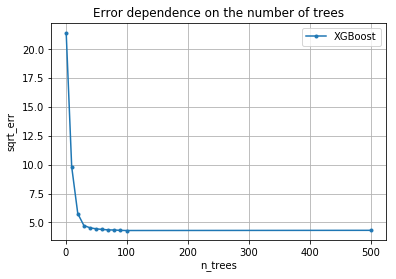

In [158]:
pylab.plot(n_trees, xgb_sqrt_err, marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('sqrt_err')
pylab.title('Error dependence on the number of trees')
pylab.legend(loc='upper right')

In [166]:
max_depths = range(1, 30, 1)

In [167]:
max_depths

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [168]:
%%time
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    xgb_sqrt_err = []
    for depth in max_depths:
        estimator = xgb.XGBRegressor(max_depth = depth, n_estimators=100)
        estimator.fit(X_train, y_train)
        sqrt_err = sqrt(mean_squared_error(y_test, estimator.predict(X_test)))
        xgb_sqrt_err.append(sqrt_err)

CPU times: user 4.77 s, sys: 16 ms, total: 4.79 s
Wall time: 4.79 s


In [169]:
xgb_sqrt_err

[4.838629763568176,
 4.461279445079721,
 4.179469150252399,
 4.130323117003958,
 4.295065957047177,
 4.367830455257683,
 4.368460757545454,
 4.432441278946748,
 4.320005703387234,
 4.3791739584302185,
 4.405440388269996,
 4.4341565224470605,
 4.324533778390014,
 4.401240916959986,
 4.346542375515693,
 4.382335827182349,
 4.383281680400115,
 4.355099451578625,
 4.3700438086825235,
 4.368549436818583,
 4.369783163253801,
 4.370767365026837,
 4.370767365026837,
 4.370767365026837,
 4.370767365026837,
 4.370767365026837,
 4.370767365026837,
 4.370767365026837,
 4.370767365026837]

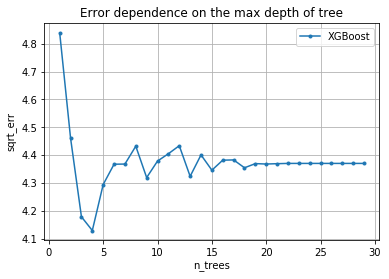

In [170]:
pylab.plot(max_depths, xgb_sqrt_err, marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('sqrt_err')
pylab.title('Error dependence on the max depth of tree')
pylab.legend(loc='upper right')

1) С увеличением числа деревьев, начиная с некоторого момента, качество работы градиентного бустинга не меняется существенно.
Да
2) С увеличением числа деревьев, начиная с некоторого момента, градиентный бустинг начинает переобучаться.
Нет
3) С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга на тестовой выборке начинает ухудшаться
Да
4) С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга перестает существенно изменяться
Да

In [176]:
XGB = xgb.XGBRegressor(max_depth = 4, n_estimators=100)

In [177]:
XGB.fit(X_train, y_train)
RMSE_4 = sqrt(mean_squared_error(y_test, XGB.predict(X_test)))

In [178]:
RMSE_4

4.130323117003958

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
LR = LinearRegression()
LR.fit(X_train, y_train)
RMSE_5 = sqrt(mean_squared_error(y_test, LR.predict(X_test)))
RMSE_5

5.458072843434623